In [1]:
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

In [2]:
from functions.import_data_parquet import NFLDataLoader
from functions.import_data_csv import import_custom_ratings
from functions.data_transformation import prep_nfl_data_py_pbp, nfl_data_py_pbp_to_drives, filter_and_subset_nfl_drive_df
from function_library.py_data_visualizations.basic_data_descriptions import basic_dataframe_description
from function_library.py_data_visualizations.basic_plots import plot_histogram, plot_bar_plot_with_optional_breakdown
from function_library.py_data_visualizations.eda_plots import visualize_correlation_heatmap

In [3]:
import numpy as np

In [4]:
nfl_data_loader = NFLDataLoader()
pbp_df = nfl_data_loader.pbp(seasons = [2022, 2023, 2024, 2025])
off_rating_df, def_rating_df = import_custom_ratings()
pbp_df = prep_nfl_data_py_pbp(pbp_df)
drive_df = nfl_data_py_pbp_to_drives(pbp_df)
drive_df = filter_and_subset_nfl_drive_df(drive_df)
drive_df = drive_df.merge(off_rating_df, how = 'left', on = ['season', 'offense'])
drive_df = drive_df.merge(def_rating_df, how = 'left', on = ['season', 'defense'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
drive_df['pts_scored'] = np.select([drive_df['drive_result'].isin(['pass_td', 'rush_td', 'off_kor_td']), drive_df['drive_result']=='field_goal_made'], [7, 3], default=0)
drive_df.to_csv("csv_output/check_drive_df.csv")
drive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21758 entries, 0 to 21757
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 21758 non-null  object 
 1   drive                   21758 non-null  float64
 2   season                  21758 non-null  int64  
 3   week                    21758 non-null  int64  
 4   offense                 21758 non-null  object 
 5   defense                 21758 non-null  object 
 6   home_team_on_offense    21758 non-null  bool   
 7   score_differential      21758 non-null  float32
 8   half                    21758 non-null  int64  
 9   qtr                     21758 non-null  float64
 10  half_seconds_remaining  21758 non-null  int64  
 11  drive_start_yard_line   21672 non-null  float64
 12  drive_end_yard_line     21672 non-null  float64
 13  drive_result            21758 non-null  object 
 14  drive_play_count        21758 non-null

In [6]:
basic_dataframe_description(drive_df, transpose_description=False)


df Overview:
 Shape: (21758, 23)
 Columns: 23
 Memory: 7.33 MB
 Missing values: 172 total
 Columns with missing values: 2
 Columns with missing values: ['drive_start_yard_line', 'drive_end_yard_line']
  Missing values per column:
    drive_start_yard_line: 86
    drive_end_yard_line: 86
 Data types: {dtype('float64'): 7, dtype('float32'): 6, dtype('int64'): 5, dtype('O'): 4, dtype('bool'): 1}


,drive,season,week,score_differential,half,qtr,half_seconds_remaining,drive_start_yard_line,drive_end_yard_line,drive_play_count,rush_attempts,pass_dropbacks,sacks,counted_penalties,total_penalties,offense_rating,defense_rating,pts_scored
count,21758.000000,21758.000000,21758.000000,21758.000000,21758.0000,21758.000000,21758.000000,21672.000000,21672.000000,21758.000000,21758.000000,21758.000000,21758.000000,21758.000000,21758.000000,21758.000000,21758.000000,21758.000000
mean,11.602031,2023.283298,9.265925,0.283252,1.5091,2.626252,800.530563,30.722822,57.537745,5.939609,2.484649,3.293869,0.226583,0.161090,0.413917,0.011055,0.007578,1.996875
std,6.664788,1.029682,5.522459,10.640402,0.5121,1.121696,613.988562,17.284942,27.411905,3.470773,2.127291,2.342124,0.466408,0.422642,0.706449,0.145471,0.087844,2.851149
min,1.000000,2022.000000,1.000000,-50.000000,1.0000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.343000,-0.233000,0.000000
25%,6.000000,2022.000000,4.000000,-6.000000,1.0000,2.000000,213.000000,21.000000,33.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-0.084000,-0.050000,0.000000
50%,11.000000,2023.000000,9.000000,0.000000,2.0000,3.000000,682.000000,26.000000,57.000000,5.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.003000,0.013000,0.000000
75%,17.000000,2024.000000,14.000000,6.000000,2.0000,4.000000,1385.000000,35.000000,84.000000,8.000000,4.000000,5.000000,0.000000,0.000000,1.000000,0.129000,0.066500,3.000000
max,35.000000,2025.000000,22.000000,50.000000,3.0000,5.000000,1800.000000,99.000000,99.000000,21.000000,16.000000,18.000000,4.000000,3.000000,6.000000,0.318000,0.243000,7.000000


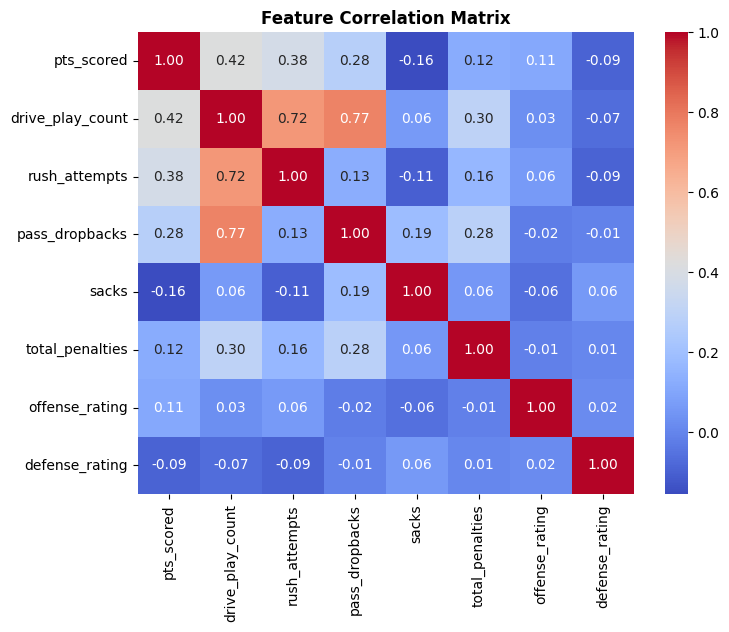

In [7]:
drive_df['defense_rating'] = drive_df['defense_rating'] * -1
visualize_correlation_heatmap(drive_df, ['pts_scored', 'drive_play_count', 'rush_attempts', 'pass_dropbacks', 'sacks', 'total_penalties', 'offense_rating', 'defense_rating'])

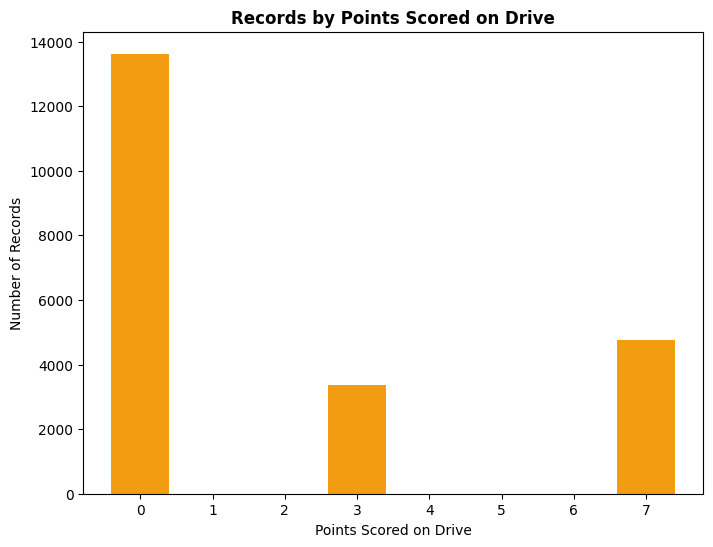

In [8]:
plot_bar_plot_with_optional_breakdown(drive_df, 'pts_scored', 'Points Scored on Drive')

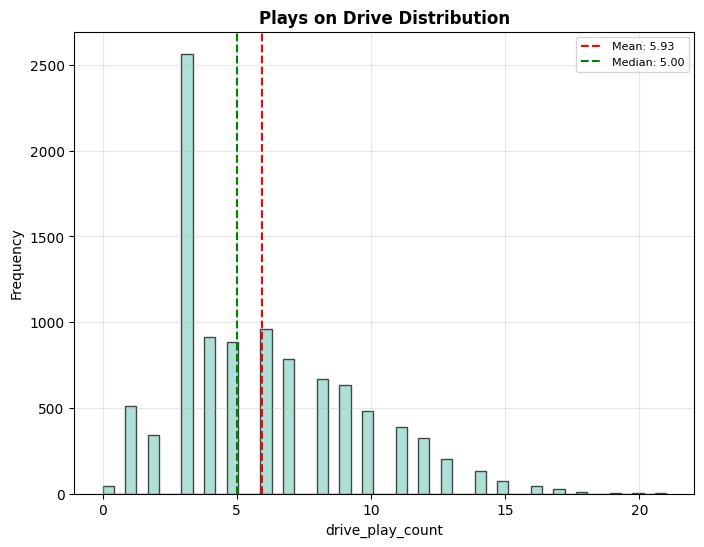

In [9]:
plot_histogram(drive_df, 'drive_play_count', 'Plays on Drive')

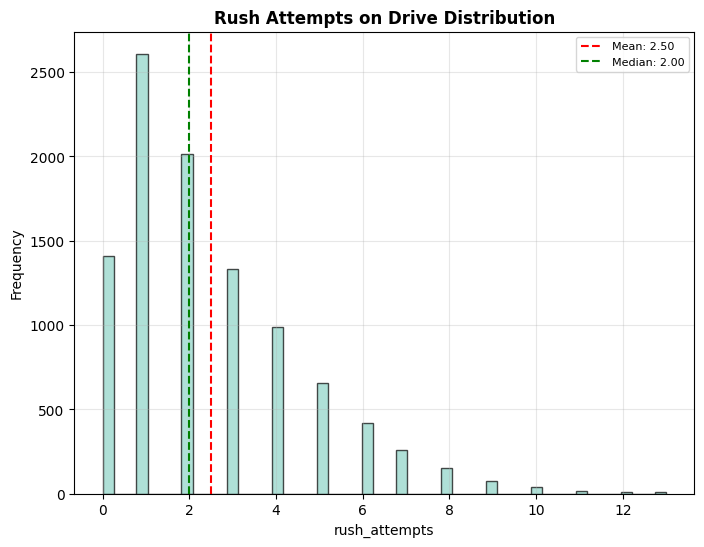

In [10]:
plot_histogram(drive_df, 'rush_attempts', 'Rush Attempts on Drive')

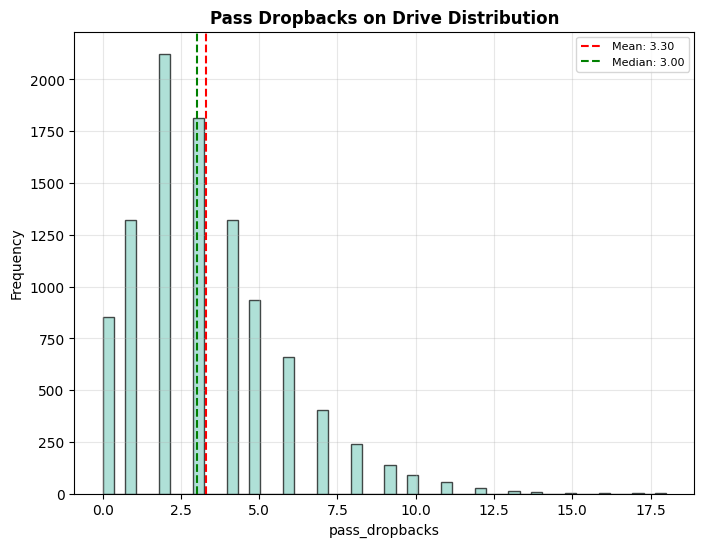

In [11]:
plot_histogram(drive_df, 'pass_dropbacks', 'Pass Dropbacks on Drive')

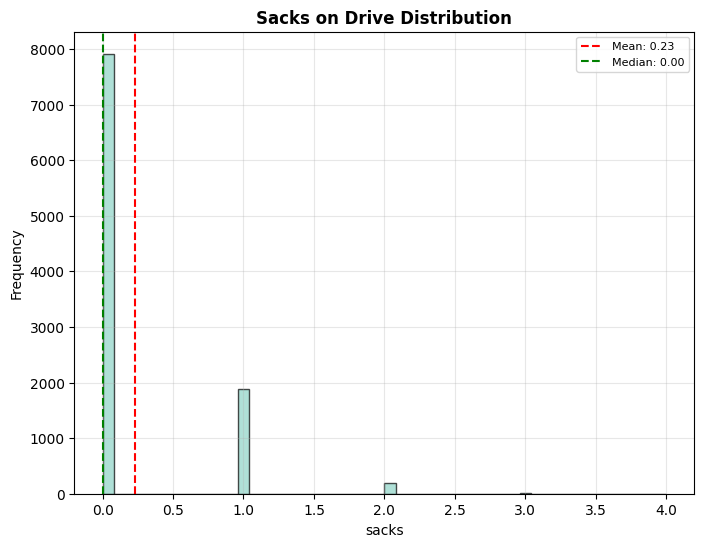

In [12]:
plot_histogram(drive_df, 'sacks', 'Sacks on Drive')